Algoritma Klasifikasi Decision Tree & Random Forest

by Nadhif Rif'at Rasendriya

Decision tree adalah representasi grafis dari berbagai pilihan untuk memecahkan masalah dan menunjukkan bagaimana berbagai faktor terkait. Pohon keputusan memiliki struktur pohon hierarki yang dimulai dengan satu pertanyaan utama di bagian atas yang disebut simpul yang kemudian bercabang ke berbagai kemungkinan hasil yang berbeda:

![Decision Tree](https://media.geeksforgeeks.org/wp-content/uploads/20250107141217134593/Decision-Tree.webp)


* Root Node adalah titik awal yang mewakili seluruh dataset.
* Branches: Ini adalah garis-garis yang menghubungkan node. Ini menunjukkan aliran dari satu keputusan ke keputusan lainnya.
* Internal Nodes adalah Titik-titik di mana keputusan dibuat berdasarkan fitur-fitur input.
* Leaf Nodes: Ini adalah node terminal di akhir cabang yang mewakili hasil akhir atau prediksi



Sekarang, mari kita ambil sebuah contoh untuk memahami pohon keputusan. Bayangkan Anda ingin memutuskan apakah akan minum kopi berdasarkan waktu dan seberapa lelah Anda. Pertama, pohon tersebut memeriksa waktu - jika hari masih pagi, pohon tersebut akan menanyakan apakah Anda lelah. Jika Anda lelah, pohon akan menyarankan untuk minum kopi, jika tidak, pohon akan mengatakan tidak perlu. Demikian pula di sore hari, pohon itu kembali bertanya apakah Anda lelah. Jika Anda menyarankan minum kopi, jika tidak, maka pohon akan menyimpulkan bahwa Anda tidak perlu minum kopi.

![Example Decision Tree](https://media.geeksforgeeks.org/wp-content/uploads/20250107141748035578/Decision-Tree-2.webp)


Ada dua jenis decision tree berdasarkan sifat variabel target: classification trees dan regression trees.

* **Classification Trees**: Pohon ini dirancang untuk memprediksi hasil kategorikal yang berarti pohon ini mengklasifikasikan data ke dalam kelas-kelas yang berbeda. Pohon ini dapat menentukan apakah sebuah email adalah “spam” atau “bukan spam” berdasarkan berbagai fitur email.
* **Regression Trees**: Ini digunakan ketika variabel target bersifat kontinu. Ini memprediksi nilai numerik daripada kategori. Sebagai contoh, pohon regresi dapat memperkirakan harga rumah berdasarkan ukuran, lokasi, dan fitur lainnya.



## Latihan Decision Tree

### Langkah 1: Import Library & Dataset

In [ ]:
# Import library utama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset Iris dari sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Convert ke DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
# Menampilkan 5 data pertama
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Langkah 2: Eksplorasi Data
Melihat informasi dataset dan distribusi kelas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


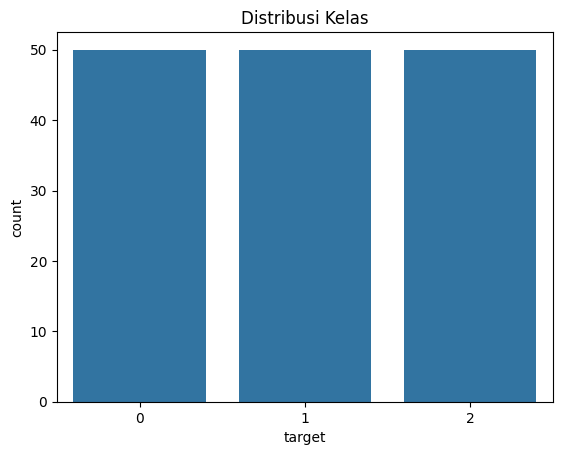

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Informasi dataset
df.info()

# Cek distribusi kelas
sns.countplot(x=df['target'])
plt.title("Distribusi Kelas")
plt.show()

# Statistik Deskriptif
df.describe()

### Langkah 3: Preprocessing Data
Melakukan pemisahan fitur dan label, serta membagi data untuk pelatihan dan pengujian.

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan label
X = df.drop(columns=['target'])
y = df['target']


# Bagi data menjadi train dan test (80:20)
data_latih = pd.concat([X, y], axis=1).sample(frac=0.8, random_state=42).reset_index(drop=True)
data_uji = pd.concat([X, y], axis=1).drop(data_latih.index).reset_index(drop=True)

# Cek ukuran data
data_latih.shape, data_uji.shape

((120, 5), (30, 5))

### Langkah 4: Training Model Decision Tree
Melatih Decision Tree menggunakan dataset yang sudah dibagi.

In [ ]:
# Fungsi menghitung Gini
def hitung_gini(kolom_kelas):
    elemen, banyak = np.unique(kolom_kelas, return_counts=True)
    gini = 1 - np.sum([(b / np.sum(banyak)) ** 2 for b in banyak])
    return gini

In [ ]:
# Fungsi menghitung Gini Split
def gini_split(data, fitur, target):
    nilai, banyak = np.unique(data[fitur], return_counts=True)
    gini_split = np.sum([(b / np.sum(banyak)) * hitung_gini(data[data[fitur] == n][target]) for n, b in zip(nilai, banyak)])
    return gini_split

In [ ]:
# Fungsi untuk membangun pohon keputusan
def buat_tree(data, fitur, target, parent_label=None):
    # Basis Kasus
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    elif len(fitur) == 0 or len(data) == 0:
        return parent_label

    parent_label = np.unique(data[target])[np.argmax(np.unique(data[target], return_counts=True)[1])]
    gini_values = [gini_split(data, f, target) for f in fitur]
    fitur_terbaik = fitur[np.argmin(gini_values)]

    tree = {fitur_terbaik: {}}
    fitur = [f for f in fitur if f != fitur_terbaik]

    for nilai in np.unique(data[fitur_terbaik]):
        sub_data = data[data[fitur_terbaik] == nilai]
        subtree = buat_tree(sub_data, fitur, target, parent_label)
        tree[fitur_terbaik][nilai] = subtree

    return tree

### Langkah 5: Visualisasi Decision Tree
Menampilkan struktur Decision Tree dalam bentuk diagram.

In [ ]:
# Membangun pohon keputusan
fitur = list(X.columns)
target = 'target'
pohon = buat_tree(data_latih, fitur, target)

### Langkah 6: Fungsi Prediksi
Menguji berbagai parameter pada Decision Tree untuk meningkatkan performa.

In [ ]:
# Fungsi prediksi
def prediksi(data, pohon):
    for fitur in list(data.keys()):
        if fitur in pohon.keys():
            try:
                hasil = pohon[fitur][data[fitur]]
            except:
                return 1  # Default jika tidak ada
            if isinstance(hasil, dict):
                return prediksi(data, hasil)
            else:
                return hasil

### Langkah 7: Evaulasi Model
Mengukur performa model menggunakan Akurasi, Confusion Matrix, dan Classification Report.

In [ ]:
# Evaluasi prediksi
prediksi_data = data_uji.iloc[:, :-1].to_dict(orient="records")
hasil_prediksi = [prediksi(d, pohon) for d in prediksi_data]
akurasi = np.mean(hasil_prediksi == data_uji[target])

print("Akurasi Model: {:.2f}".format(akurasi))

Akurasi Model: 0.93


### Kesimpulan


1. **Decision Tree** adalah algoritma yang mudah digunakan dan diinterpretasikan.
2. Model ini mencapai akurasi tinggi pada dataset Iris, tetapi dapat mengalami **overfitting** pada dataset besar.
3. Hyperparameter seperti **max_depth** berpengaruh signifikan terhadap performa model.


## Tugas Decision Tree (Random Forest)

### **Random Forest Classifier Algorithm**

Algoritma Random Forest Classifier adalah algoritma pembelajaran mesin populer yang dikembangkan oleh Leo Breiman dan Adele Cutler. Algoritma ini menggabungkan output dari beberapa pohon keputusan untuk mendapatkan satu hasil, sehingga membuatnya serbaguna untuk masalah klasifikasi dan regresi.

#### **1. Hyperparameter**
Hyperparameter utama yang digunakan pada algoritma random forest ini adalah:
*   **shuffle: Randomize decision (keputusan pengacakan data)**
*   **n_estimators: Number of trees (jumlah pohon keputusan)**
*   **random_state: Randomize data (pengacakan data)**
*   **n_splits: Folds number (jumlah lipatan cross-validation)**






#### **2. Decision Tree**

Pohon keputusan dari algoritma ini dimulai dengan pertanyaan dasar dan bercabang dengan lebih banyak pertanyaan (decision nodes) untuk mencapai keputusan akhir (leaf node). Pohon-pohon keputusan ini dilatih menggunakan algoritma Classification and Regression Tree (CART) dan mengevaluasi pemisahan berdasarkan metrik seperti Gini impurity, information gain, atau mean square error. Meskipun efektif, pohon keputusan dapat mengalami bias dan overfitting.

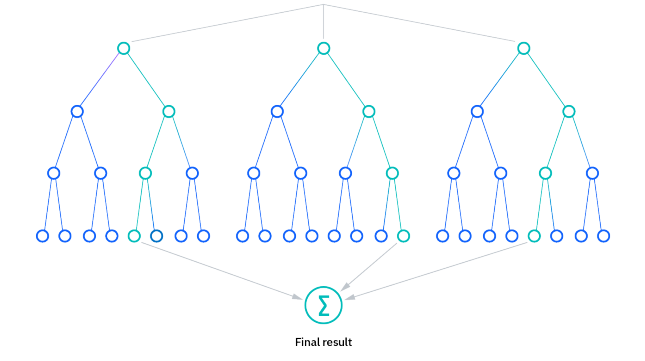


#### **3. Ensemble Method**

Metode pembelajaran ensemble, seperti bagging dan boosting, menggunakan beberapa pengklasifikasi untuk menggabungkan prediksi untuk hasil yang lebih akurat. Bagging, yang diperkenalkan oleh Leo Breiman pada tahun 1996, melibatkan pembuatan beberapa sampel data dengan penggantian dan pelatihan model secara independen pada sampel-sampel ini. Pendekatan ini mengurangi varians dan meningkatkan akurasi.

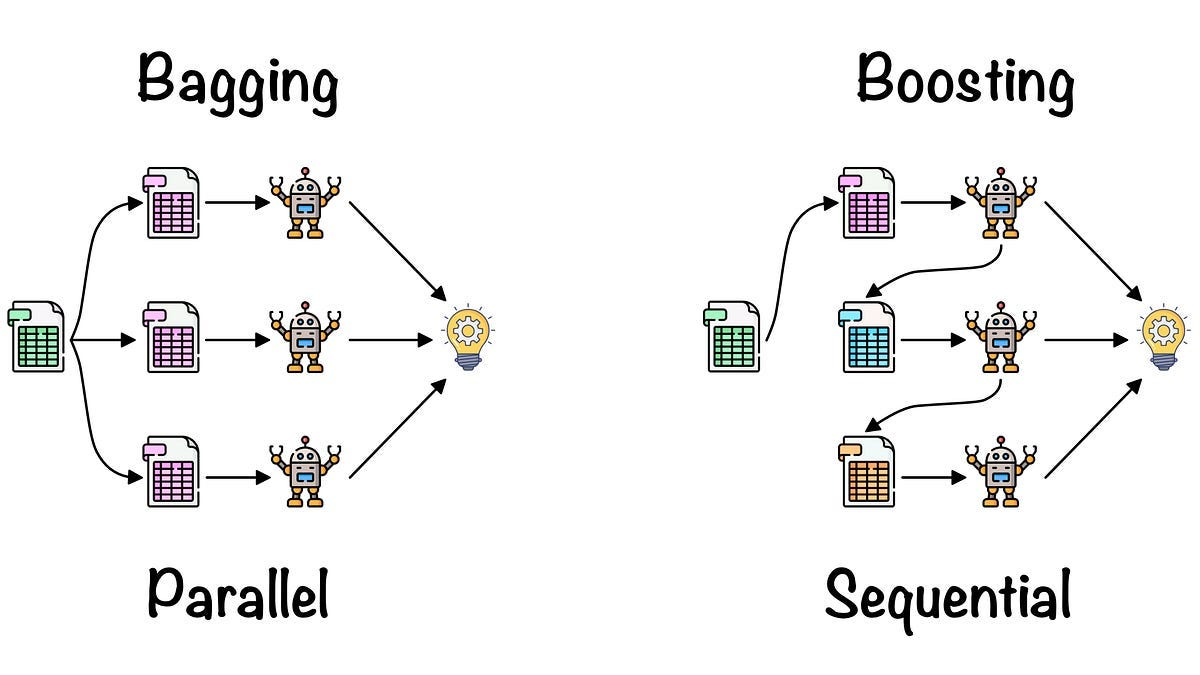

#### **4. Algoritma Random Forest**

Algoritma random forest memperluas bagging dengan menambahkan keacakan fitur, memastikan korelasi yang rendah di antara pohon-pohon keputusan. Setiap pohon di dalam hutan dilatih dengan sampel bootstrap dari data pelatihan, dan subset fitur acak digunakan untuk memisahkan node. Hal ini mengurangi overfitting, bias, dan varians, sehingga menghasilkan prediksi yang lebih tepat.

Random forest classifier dapat menangani tugas regresi dan klasifikasi. Untuk regresi, ia menggunakan rata-rata prediksi dari masing-masing pohon, sedangkan untuk klasifikasi, ia menggunakan suara mayoritas. Selain itu, sampel di luar kantong (out-of-bag (oob)) digunakan untuk validasi silang, sehingga meningkatkan keandalan model.


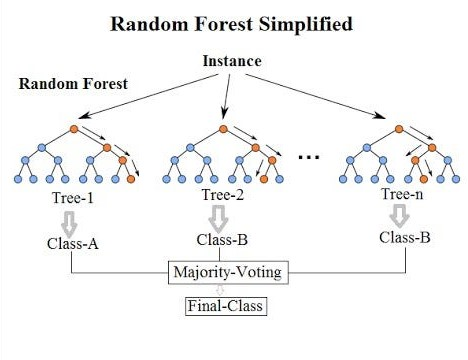

### Langkah 1: Import Library & Dataset

In [ ]:
# Instalasi dan import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Load dataset Titanic dari seaborn
data = sns.load_dataset("titanic")

In [ ]:
# Menampilkan 5 data pertama
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Langkah 2: Eksplorasi Data
Melihat informasi dataset dan distribusi kelas.

In [ ]:
# Informasi dataset
print("Informasi Dataset:")
print(data.info())

# Cek distribusi kelas
print("\nDistribusi Kelas:")
print(data["survived"].value_counts())

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Distribusi Kelas:
survived
0    549
1    342
Name: cou

In [ ]:
# Mengecek tipe data dari setiap kolom
data.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [ ]:
# Mencetak jumlah data item yang unik atau memiliki nilai item berbeda
data.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [ ]:
# Mengecek nilai kolom yang missing atau kosong
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### Langkah 3: Preprocessing Data
Melakukan cleaning data, pemisahan fitur dan label, serta membagi data untuk pelatihan dan pengujian.

In [ ]:
# Menghapus kolom dengan terlalu banyak missing values dan yang tidak relevan ('deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone', 'embarked')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data = data.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone', 'embarked'])

In [ ]:
# Mengisi missing values (age) dengan median
data['age'].fillna(data_cleaned['age'].median(), inplace=True)

<ipython-input-538-0db832e1b655>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data_cleaned['age'].median(), inplace=True)


In [ ]:
# Verifikasi apakah masih ada missing values
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0


In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
data.loc[:, 'age'] = data['age'].fillna(data['age'].median())

In [ ]:
print(X_train.isnull().sum())

pclass      0
age         0
sibsp       0
parch       0
fare        0
sex_male    0
dtype: int64


In [ ]:
print(X_test.isnull().sum())

pclass      0
age         0
sibsp       0
parch       0
fare        0
sex_male    0
dtype: int64


In [ ]:
# Mengecek data setelah menghapus kolom yang tidak relevan
data.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
# Mengubah fitur kategori menjadi numerik ('sex')
categorical_features = ['sex']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(data[categorical_features])
categorical_data = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
categorical_data.head()

,sex_male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [ ]:
# Menggabungkan dengan data utama dan menghapus fitur kategori asli
data = data.drop(columns=categorical_features)
data = pd.concat([data, categorical_data], axis=1)

In [ ]:
# Memisahkan fitur dan target survived
X = data.drop(columns=['survived'])  # fitur
y = data['survived']  # target

In [ ]:
# Split data menjadi train dan test (80:20)
# Gamau kak saya maunya 70 : 30 hehe :)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (623, 6)
Shape X_test: (268, 6)
Shape y_train: (623,)
Shape y_test: (268,)


In [ ]:
# X_train['age'].fillna(X_train['age'].median(), inplace=True)
# X_test['age'].fillna(X_test['age'].median(), inplace=True)

# X_train['deck'].fillna(X_train['deck'].mode()[0], inplace=True)
# X_test['deck'].fillna(X_test['deck'].mode()[0], inplace=True)

# X_train['embark_town'].fillna(X_train['embark_town'].mode()[0], inplace=True)
# X_test['embark_town'].fillna(X_test['embark_town'].mode()[0], inplace=True)

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

pclass      0
age         0
sibsp       0
parch       0
fare        0
sex_male    0
dtype: int64
pclass      0
age         0
sibsp       0
parch       0
fare        0
sex_male    0
dtype: int64


In [ ]:
# Standarisasi fitur numerik
numerical_features = ['age', 'fare']
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male
445,1,-1.919719,0,2,0.980998,1.0
650,3,-0.077252,0,0,-0.469634,1.0
172,3,-2.150028,1,1,-0.406136,0.0
450,2,0.536903,1,2,-0.080232,1.0
314,2,1.074289,1,1,-0.109651,1.0


In [ ]:
# categorical_features = ['embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
# X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
# X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

In [ ]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male
445,1,-1.919719,0,2,0.980998,1.0
650,3,-0.077252,0,0,-0.469634,1.0
172,3,-2.150028,1,1,-0.406136,0.0
450,2,0.536903,1,2,-0.080232,1.0
314,2,1.074289,1,1,-0.109651,1.0


### Langkah 4: Training Model Random Forest
Melatih Decision Tree menggunakan dataset yang sudah dibagi.

In [ ]:
# X = data_cleaned.drop(columns=['survived'])
# y = data_cleaned['survived']
# X = pd.get_dummies(X, drop_first=True)

In [ ]:
X = data.drop(columns=['survived'])
y = data['survived']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
print(X.dtypes)

pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
sex_male    float64
dtype: object


In [ ]:
X['sex_male'] = X['sex_male'].astype(int)

In [ ]:
for col in X.columns:
    print(f"{col}: {X[col].apply(lambda x: isinstance(x, str)).sum()} string values")

pclass: 0 string values
age: 0 string values
sibsp: 0 string values
parch: 0 string values
fare: 0 string values
sex_male: 0 string values


In [ ]:
X.fillna(X.mean(), inplace=True)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
# Training model Random Forest sederhana
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

### Langkah 5: Visualisasi Data
Menampilkan struktur Decision Tree dalam bentuk diagram.

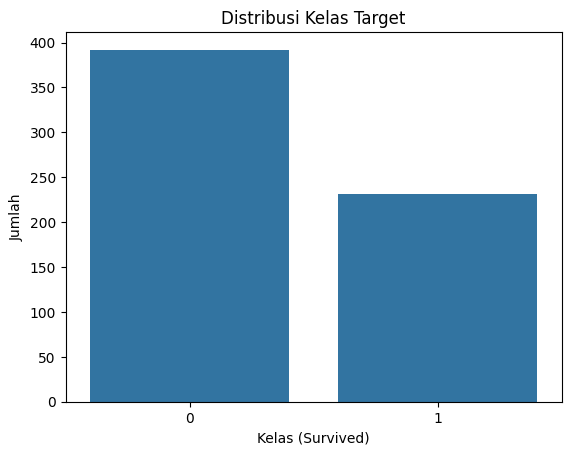

survived
0    392
1    231
Name: count, dtype: int64


In [ ]:
# Visualisasi distribusi kelas target
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas (Survived)")
plt.ylabel("Jumlah")
plt.show()

# Menampilkan jumlah masing-masing kelas dalam bentuk angka
print(y_train.value_counts())

<Figure size 1200x600 with 0 Axes>

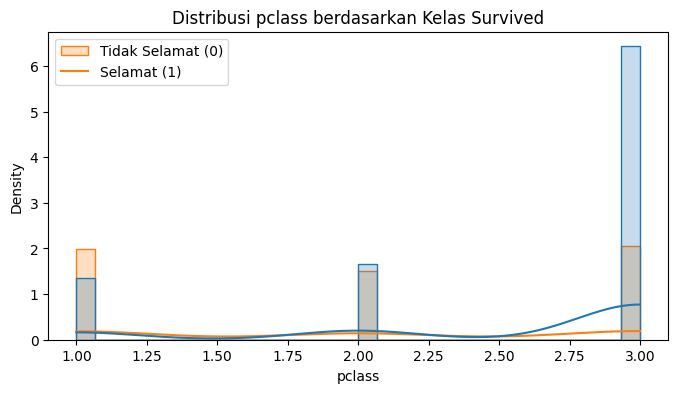

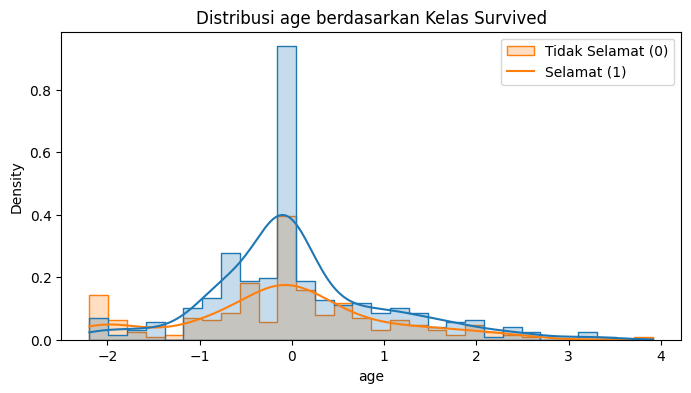

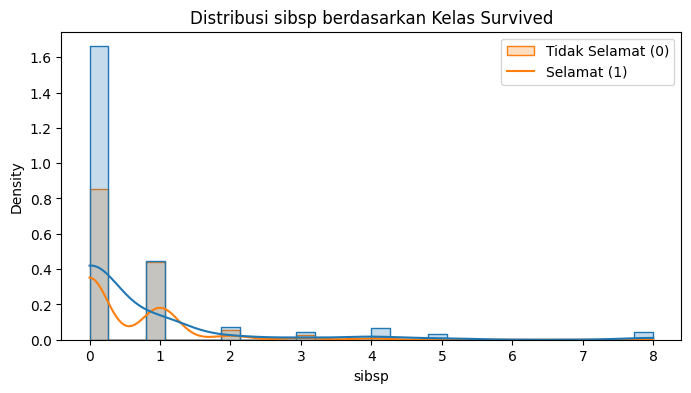

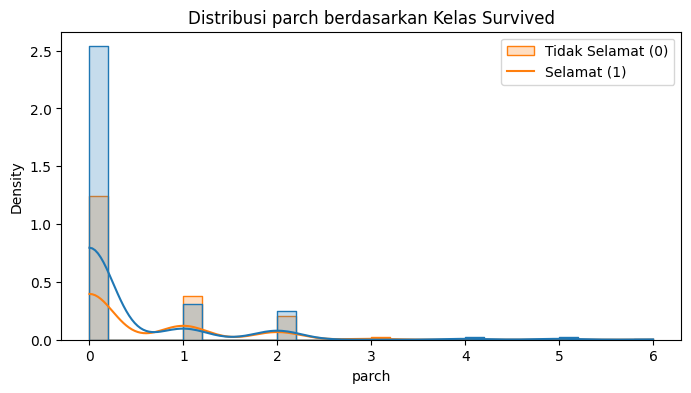

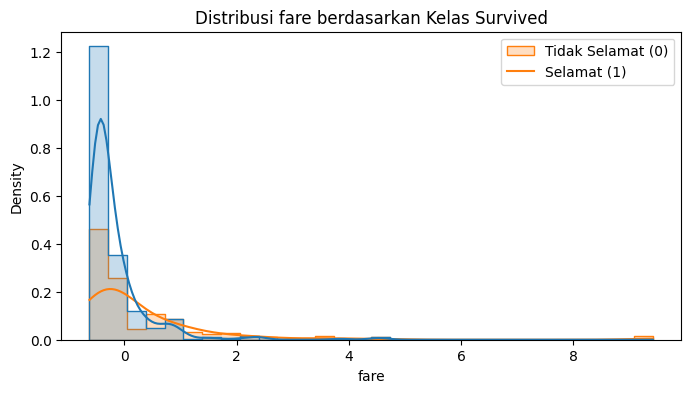

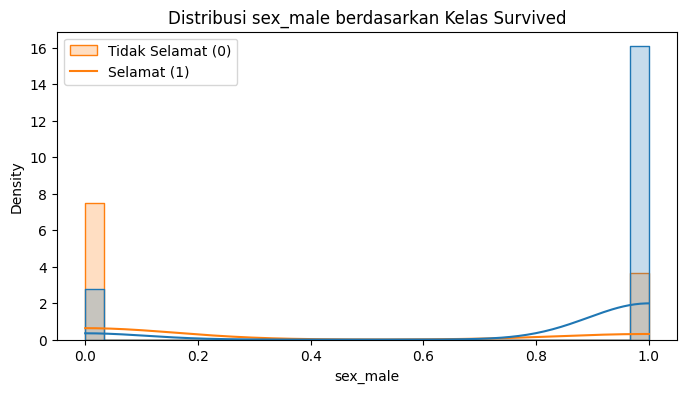

In [ ]:
# Visualisasi distribusi fitur numerik berdasarkan kelas target
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=X_train, x=feature, hue=y_train, kde=True, bins=30, element="step", stat="density")
    plt.title(f"Distribusi {feature} berdasarkan Kelas Survived")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(["Tidak Selamat (0)", "Selamat (1)"])
    plt.show()

### Langkah 6: Evaluasi Model
Mengukur performa model menggunakan Akurasi, Confusion Matrix, dan Classification Report.

In [ ]:
# Evaluasi Model akurasi
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

Akurasi Model: 0.7948


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Akurasi Model: 0.7948
Precision: 0.7938
Recall: 0.7948
F1-Score: 0.7929
Mean Squared Error (MSE): 0.2052
R² Score: 0.1542


Dari hasil evaluasi model Random Forest:

Akurasi Model: 0.7948 (79.48%) → Model cukup baik dalam mengklasifikasikan data dengan benar.

Precision: 0.7938 → Dari semua prediksi positif, sekitar 79.38% benar.

Recall: 0.7948 → Dari semua kasus positif yang sebenarnya, model berhasil mengidentifikasi 79.48%.

F1-Score: 0.7929 → Rata-rata harmonik antara precision dan recall menunjukkan model cukup seimbang dalam mendeteksi kelas positif dan negatif.

Mean Squared Error (MSE): 0.2052 → Meskipun MSE lebih sering digunakan untuk regresi, nilai yang relatif rendah menunjukkan bahwa kesalahan model cukup kecil.

R² Score: 0.1542 → Nilai R² yang cukup rendah menunjukkan bahwa model masih memiliki ruang untuk perbaikan dalam menjelaskan variabilitas data.


Kesimpulannya model Random Forest ini memiliki performa yang cukup baik dengan akurasi hampir 80%, menunjukkan bahwa model bisa digunakan untuk prediksi dengan tingkat kepercayaan yang cukup tinggi. Namun, nilai R² yang rendah menunjukkan bahwa model mungkin belum menangkap semua pola dalam data. Jika ini adalah klasifikasi, maka evaluasi berbasis Precision, Recall, dan F1-Score sudah cukup bagus. Tapi jika ini regresi, model masih perlu ditingkatkan dengan hyperparameter tuning atau menggunakan fitur yang lebih relevan.

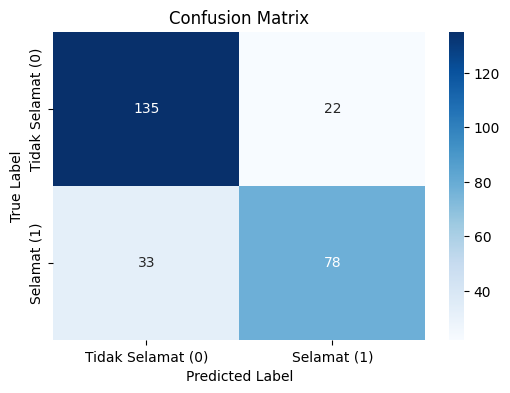

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Tidak Selamat (0)", "Selamat (1)"], yticklabels=["Tidak Selamat (0)", "Selamat (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In classification problems, there are four types of predictions:

True Positive (TP) – The model correctly predicts a positive class when the actual class is also positive.

True Negative (TN) – The model correctly predicts a negative class when the actual class is negative.

False Positive (FP) – The model incorrectly predicts a positive class when the actual class is negative (also known as a Type I error).

False Negative (FN) – The model incorrectly predicts a negative class when the actual class is positive (also known as a Type II error).


1 ->   P = T, A = T  -> TP

2 ->  P = T, A = F  -> TN

3 ->  P = F, A = F  -> FP

4 ->  P = F, A = T  -> FN

Jadi dari visualisasi confusion matrix, masih ada 55 data (33 + 22) yang missclasified

<ipython-input-570-4baab6268472>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=feature_df, palette='viridis')


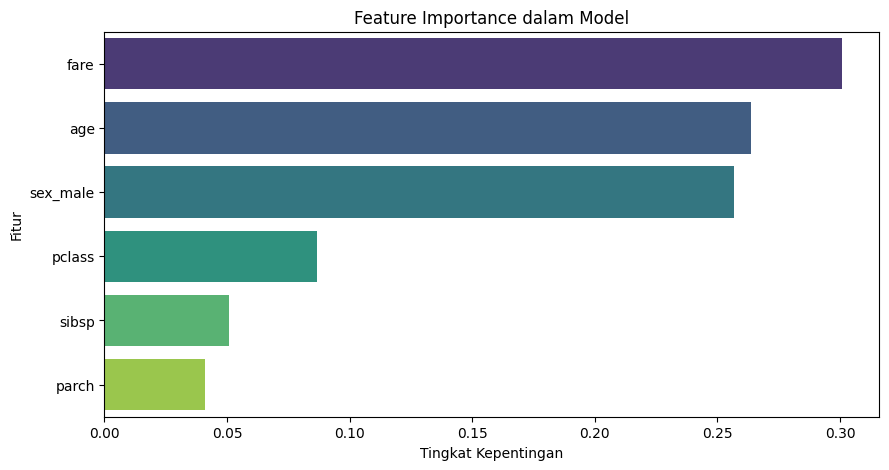

In [ ]:
# Analisis Feature Importance
feature_importance = model.feature_importances_

feature_df = pd.DataFrame({'Fitur': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Fitur', data=feature_df, palette='viridis')
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.title("Feature Importance dalam Model")
plt.show()

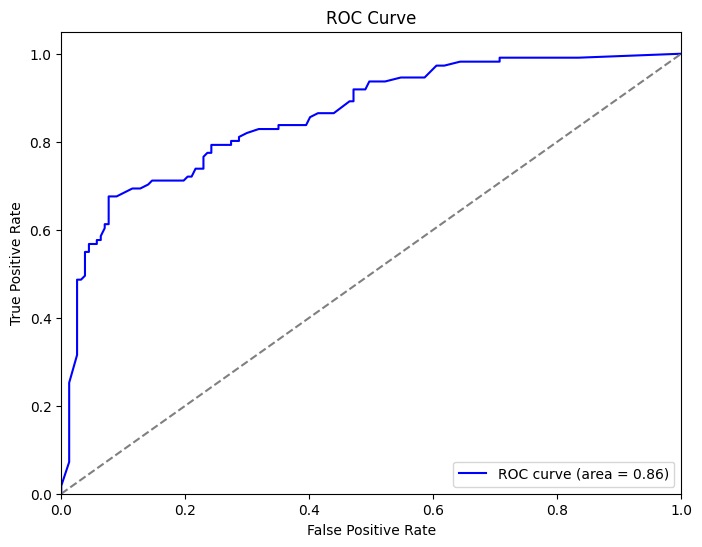

In [ ]:
# Evaluasi dengan ROC-AUC Score
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Disini bisa kita lihat bahwa AUC nya 0.86, kalau AUC ini diatas 90 berarti indikasi kalau modelnya bagus (area dibawah kurva / error area nya kecil), tapi karena masih dibawah 0.90 berarti model random forest ini masih kurang bagus.

### Kesimpulan

#### Decision Tree
Decision Tree adalah model klasifikasi berbasis pohon yang mudah diinterpretasikan dan digunakan. Model ini bekerja dengan membagi data berdasarkan fitur yang paling berpengaruh dalam menentukan keputusan, mirip dengan pohon faktor. Selain itu model ini cukup mudah di implementasikan.

Kelebihan: Mudah dipahami, cepat dalam training, dan cocok untuk dataset kecil.

Kekurangan: Rentan terhadap overfitting jika pohon terlalu dalam, serta kurang robust terhadap perubahan kecil dalam data.

Selain itu pada percobaan saya pribadi, saya juga pernah menemukan bahwa akurasi dari Decision Tree ini sangatlah kurang jika dibandingkan model lain seperti SVM, saya pernah menemui hasil decision tree:

✅ Akurasi: 0.80
✅ Precision: 0.67
✅ Recall: 1.00
✅ F1 Score: 0.80
✅ Mean Squared Error: 0.20
✅ R² Score: 0.17

Maka Decision Tree hanya mencapai akurasi 80%, Precision 0.67, Recall 1.00, dan F1 Score 0.80, yang berarti model ini masih memiliki beberapa kesalahan dalam prediksi positif.


#### Random Forest
Random Forest adalah metode ensemble yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Di praktikum ini saya belajar untuk membuat model nya mulai dari data preprocessing, modul modul yang diperlukan, training model, visualisasi data, hingga evaluasi model.

Namun praktikum ini belum sampai hyperparameter tuning jadi kemungkinan hasil score masih kurang akurat karena possible adanya overfitting dan underfitting. Karena setau saya biasanya harus melewati hyperparameter tuning dulu seperti RandomizedSearchCV untuk mengakuratkan model sebelum masuk ke Confusion Matrix.

Dari hasil evaluasi, ditemukan bahwa model Random Forest ini memiliki performa yang cukup baik dengan akurasi hampir 80%, menunjukkan bahwa model bisa digunakan untuk prediksi dengan tingkat kepercayaan yang cukup tinggi. Namun, nilai R² yang rendah menunjukkan bahwa model mungkin belum menangkap semua pola dalam data. Jika ini adalah klasifikasi, maka evaluasi berbasis Precision, Recall, dan F1-Score sudah cukup bagus. Tapi jika ini regresi, model masih perlu ditingkatkan dengan hyperparameter tuning atau menggunakan fitur yang lebih relevan.

Kelebihan: Model ini lebih stabil dibandingkan Decision Tree karena mengurangi variabilitas model dengan menggabungkan banyak pohon. Cocok untuk dataset besar dan kompleks.


Kekurangan: Lebih lambat dalam training dan lebih sulit untuk diinterpretasikan dibandingkan satu Decision Tree.


Kesimpulannya, Decision Tree cocok untuk tugas klasifikasi sederhana dengan interpretasi yang jelas, sedangkan Random Forest lebih unggul dalam hal akurasi dan ketahanan terhadap overfitting, terutama untuk dataset yang lebih kompleks.